### ===================================================================  
>>> # Bank Customer Churn Prediction  
### ===================================================================

## Problem Statement
- Customer churn is major problem for bank because aquiring new customer is expensive than retaining existing customer
- So the objective of this project is to build a machine learning model that can predict the customer who likely to leave the bank, so that the bank can take proactive retention actions

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report, auc, roc_auc_score,roc_curve, accuracy_score, precision_score, recall_score,f1_score

### 2. Load Dataset, its Overview and Target variable

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset Contains demographic, fanancial and account related information   
Target varible is churn  
Here,  
- churn 0 : "Customer stayed"
- churn 1 : "Customer left"

### 3. Basic EDA(Explaratory Data Analysis)

In [3]:
#shape of dataset
print(df.shape) 

(10000, 12)


In [4]:
#information of Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [5]:
# check null values
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [6]:
# checking duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
## analyzing Target variable
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

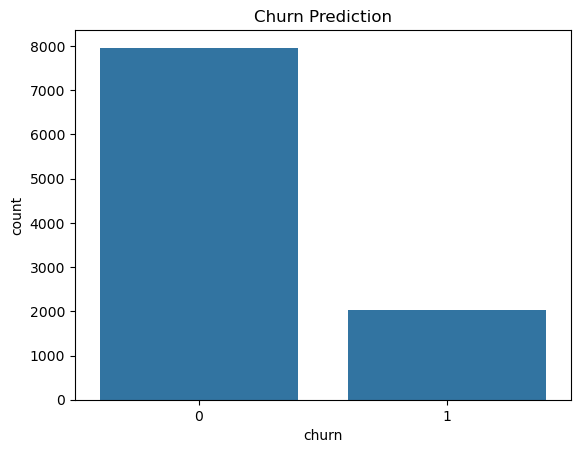

In [8]:
## Visualizing class imbalance
sns.countplot(x=df.churn)
plt.title('Churn Prediction')
plt.show()

In [9]:
#since customer id is irrelevent feature so we will drop it
df.drop(columns='customer_id',inplace = True)

### 4. Target / Predictor seperator

In [10]:
X = df.iloc[:,:-1]
y = df.churn

### 5.Train Test Split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, stratify=y)

### 6. Identify numeric and catogorical columns

In [12]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [13]:
df.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [14]:
num_col = ['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']
cat_col = ['country','gender']

### 6. Preprocessing Techniques

In [15]:
preprocessor = ColumnTransformer([
    ('num',MinMaxScaler(),num_col), #scaling down the numeric columns 
    ('cat',OneHotEncoder(drop = 'first'),cat_col) # encoding the categorical columns
])

### 7. Implementing Logistic Regression Model

In [16]:
pipeline_LR = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessing
    ('smote',SMOTE(random_state=42)), # handle class imbalance
    ('model',LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42))#training model
])

In [17]:
#Training model
pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [18]:
# Prediction using model
y_pred_LR = pipeline_LR.predict(X_test) #predicted classes
y_prob_LR = pipeline_LR.predict_proba(X_test)[:,1]#predicted probobilities for roc

In [19]:
#Evaluating model
print('roc_auc score:',roc_auc_score(y_test,y_prob_LR))
print('Logistic Regression for classification Report')
print(classification_report(y_test,y_pred_LR))

roc_auc score: 0.7873998809969026
Logistic Regression for classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1991
           1       0.40      0.72      0.51       509

    accuracy                           0.72      2500
   macro avg       0.65      0.72      0.66      2500
weighted avg       0.81      0.72      0.75      2500



### 8. Implementing Random Forest Classifier

In [20]:
pipeline_RFC = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE()),   #handle class imbalance
    ('RandomForestrClassifier',RandomForestClassifier(n_estimators=140,
                                                      max_depth=5,
                                                      random_state=42))
])

In [21]:
# training model
pipeline_RFC.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE()),
                ('RandomForestrClassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=140,
                                        random_state=42))])

In [22]:
# prediction using model
y_pred_RFC = pipeline_RFC.predict(X_test) 
y_prob_RFC = pipeline_RFC.predict_proba(X_test)[:,-1]

In [23]:
# Evaluating model
print('roc_auc_score',roc_auc_score(y_test,y_prob_RFC))
print('Classification report of Random Forest Classifier')
print(classification_report(y_test,y_pred_RFC))

roc_auc_score 0.863552982527464
Classification report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1991
           1       0.51      0.73      0.60       509

    accuracy                           0.80      2500
   macro avg       0.72      0.78      0.74      2500
weighted avg       0.84      0.80      0.81      2500



### 9. Implementing AdaBoost Classifier

In [24]:
#create a pipeline
pipeline_AB = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE()),   #handle class imbalance
    ('AdaBoostClassifier',AdaBoostClassifier(random_state=42))
])

In [25]:
#training model
pipeline_AB.fit(X_train,y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE()),
                ('AdaBoostClassifier', AdaBoostClassifier(random_state=42))])

In [26]:
#prediction using model
y_pred_AB = pipeline_AB.predict(X_test)
y_prob_AB = pipeline_AB.predict_proba(X_test)[:,-1] 

In [27]:
#Evaluating model
print('roc_auc_score',roc_auc_score(y_test,y_prob_AB))
print('Classification report of AdaBoost Classifier')
print(classification_report(y_test,y_pred_AB))

roc_auc_score 0.8571573061093191
Classification report of AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1991
           1       0.51      0.73      0.60       509

    accuracy                           0.80      2500
   macro avg       0.72      0.78      0.74      2500
weighted avg       0.84      0.80      0.82      2500



### 10. Implementing Gradient Boosting Classifier

In [28]:
# create a pipeline for model
pipeline_GB = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE()),   #handle class imbalance
    ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=42))
])

In [29]:
#training model
pipeline_GB.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE()),
                ('GradientBoostingClassifier',
                 GradientBoostingClassifier(random_state=42))])

In [30]:
#Prediction using model
y_pred_GB = pipeline_GB.predict(X_test)
y_prob_GB = pipeline_GB.predict_proba(X_test)[:,1]

In [31]:
#Evaluating model
print('roc_auc_score is',roc_auc_score(y_test,y_prob_GB))
print('Classification report of Gradient Boosting Classifier is')
print(classification_report(y_test,y_pred_GB))

roc_auc_score is 0.8704321707013586
Classification report of Gradient Boosting Classifier is
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1991
           1       0.60      0.69      0.64       509

    accuracy                           0.84      2500
   macro avg       0.76      0.78      0.77      2500
weighted avg       0.85      0.84      0.85      2500



**Note:  
For Random Forest Classifier, AdaBoost Classifier, and Gradient Boosting Classifier, applying SMOTE is optional because these models can handle class imbalance internally to some extent.
However, in our experiments, applying SMOTE resulted in a slight improvement in performance, particularly in recall and F1-score for the minority (churn) class.**

### Hyperparameter Tuning on Gradinet Boosting Classifier

- Gradient Boosting Classifier performed better among the all models so we will apply hyperparameter tuning on it.

In [32]:
#create a prameter grid
param_grid = {
    'GradientBoostingClassifier__n_estimators':[50,70,90],
    'GradientBoostingClassifier__learning_rate':[0.02,0.03,0.04],
    'GradientBoostingClassifier__max_depth':[2,3,4]
} 
# here we are tuning only Gradient boosting classifier, preprocessing and SMOTE remain unchanged

In [33]:
gscv = GridSearchCV(estimator=pipeline_GB,param_grid=param_grid, cv =5,n_jobs=-1, verbose=3)

In [34]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('smote', SMOTE()),
                                       ('GradientBoostingClassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'GradientBoostingClassifier__learning_rate': [0.02,
                                                                       0.03,
                                                                       0.04],
                         'GradientBoostingClassifier__max_depth': [2, 3, 4],
                         'GradientBoostingClassifier__n_estimators': [50, 70,
                                                                      90]},
             verbose=3)

In [35]:
y_pred_gscv = gscv.predict(X_test)
y_prob_gscv = gscv.predict_proba(X_test)[:,1]

In [36]:
print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1991
           1       0.57      0.70      0.63       509

    accuracy                           0.83      2500
   macro avg       0.74      0.78      0.76      2500
weighted avg       0.85      0.83      0.84      2500



In [37]:
gb_model = pipeline_GB.named_steps['GradientBoostingClassifier']

In [38]:
importanc = gb_model.feature_importances_

In [39]:
feature_names = pipeline_GB.named_steps['preprocessor'].get_feature_names_out()

In [40]:
feature_importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importanc
}).sort_values('Importance',ascending=False)

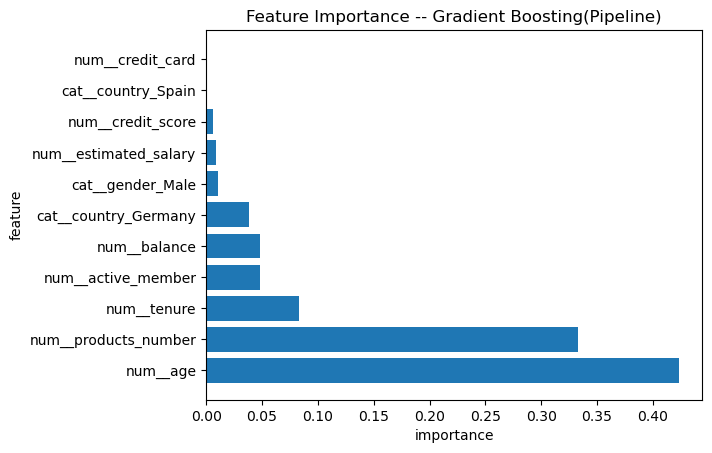

In [41]:
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('Feature Importance -- Gradient Boosting(Pipeline)')
plt.show()

- The feature importance graph shows which feature have the most influence on the churn prediction
- Age and number of products are more important features, indicating thay strongly affect customer churn
- Other features like balance,active memeber,tenure and gender have comparativly lower impact

### AGE VS CHURN

- since age is continues variable with many unique values which makes us hard to understasnd. so we group them into bins

In [42]:

df['Age_group'] = pd.cut(df['age'],bins=[18,30,40,50,60,70,100],labels=['18-30','31-30','41-50','51-60','61-70','70+'])

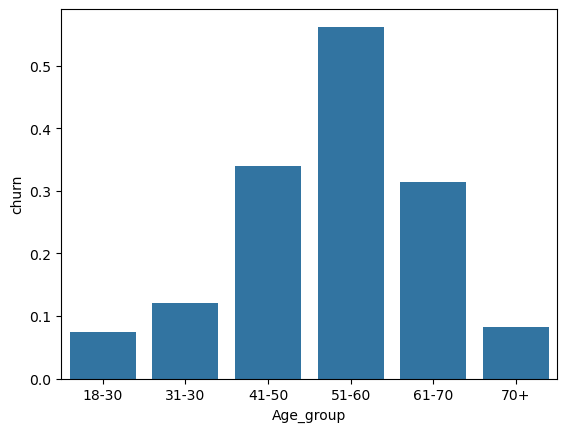

In [43]:
sns.barplot(x=df.Age_group,y=df.churn,errorbar=  None)
plt.show()

- The graph shows churn rate across the different age groups 
- Churn is lowest for youngest customer, increases with hight
- Churn rate highest for customer aged 51-60
- After age 60 the churn rate decreases again 

### Product Number VS Churn

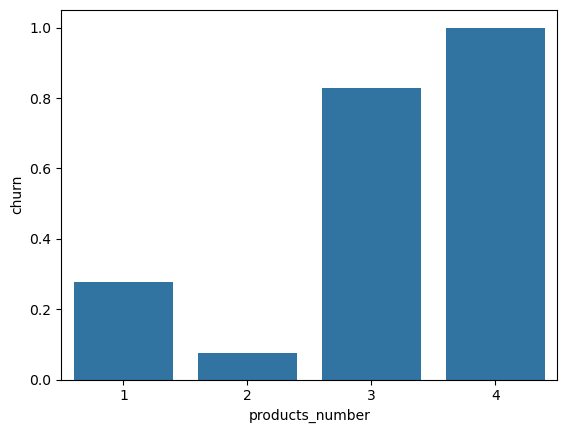

In [44]:
sns.barplot(x=df.products_number,y = df.churn, errorbar=None)
plt.show()

- Customer using fewer bank products have a higher churn probability 

### 11. Comparing AUC-Curve with AUC score of all models

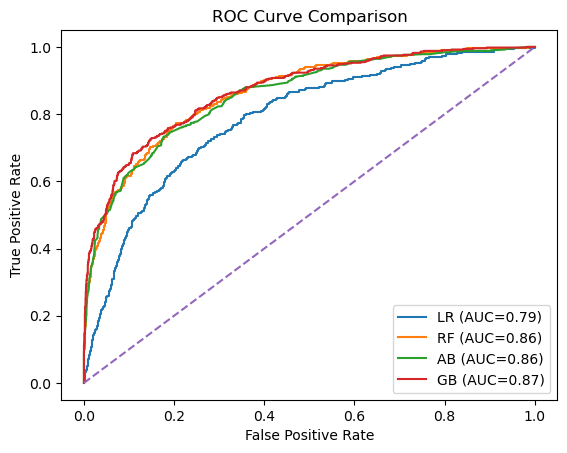

In [45]:
fpr_LR, tpr_LR, thres_LR = roc_curve(y_test,y_prob_LR)
fpr_RF, tpr_RF, thres_RF = roc_curve(y_test,y_prob_RFC)
fpr_AB, tpr_AB, thres_AB = roc_curve(y_test,y_prob_AB)
fpr_GB, tpr_GB, thres_GB = roc_curve(y_test,y_prob_GB)
fpr_GB_gscv, tpr_GB_gscv, thres_GB_gscv = roc_curve(y_test,y_prob_gscv)

plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC={auc(fpr_LR, tpr_LR):.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'RF (AUC={auc(fpr_RF, tpr_RF):.2f})')
plt.plot(fpr_AB, tpr_AB, label=f'AB (AUC={auc(fpr_AB, tpr_AB):.2f})')
plt.plot(fpr_GB, tpr_GB, label=f'GB (AUC={auc(fpr_GB, tpr_GB):.2f})')

plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### ROC Curve Comparison
- ROC Curves were plotted for all the models to compare their ability to distinguish between churn and non churn customers
- The model with curve closest to the top-left corner and highest AUC score indicate better performance
- Among all the models, Gradient Boosting Classifier showed highest ROC-AUC and and most stable curve, making  the best model for churn prediction

### Model Comparison Table

In [46]:
model = []
model.append({
    'Model':"Logistic Regression",
    'Precision':precision_score(y_test,y_pred_LR),
    'Recall':recall_score(y_test,y_pred_LR),
    'F1 Score':f1_score(y_test,y_pred_LR),
    'ROC_AUC':roc_auc_score(y_test,y_prob_LR)
})

model.append({
    'Model':"Random Forest Classifier",
    'Precision':precision_score(y_test,y_pred_RFC),
    'Recall':recall_score(y_test,y_pred_RFC),
    'F1 Score':f1_score(y_test,y_pred_RFC),
    'ROC_AUC':roc_auc_score(y_test,y_prob_RFC)
})

model.append({
    'Model':"Ada Boosting Classifier",
    'Precision':precision_score(y_test,y_pred_AB),
    'Recall':recall_score(y_test,y_pred_AB),
    'F1 Score':f1_score(y_test,y_pred_AB),
    'ROC_AUC':roc_auc_score(y_test,y_prob_AB)
})

model.append({
    'Model':"Gradient Boosting Classifier",
    'Precision':precision_score(y_test,y_pred_GB),
    'Recall':recall_score(y_test,y_pred_GB),
    'F1 Score':f1_score(y_test,y_pred_GB),
    'ROC_AUC':roc_auc_score(y_test,y_prob_GB)
})
camp_table = pd.DataFrame(model)

In [47]:
camp_table.sort_values('ROC_AUC',ascending=False)

,Model,Precision,Recall,F1 Score,ROC_AUC
3,Gradient Boosting Classifier,0.596252,0.687623,0.638686,0.870432
1,Random Forest Classifier,0.510989,0.730845,0.601455,0.863553
2,Ada Boosting Classifier,0.513067,0.732809,0.603560,0.857157
0,Logistic Regression,0.397826,0.719057,0.512246,0.787400


### Model Camparison
- Multiple machine learning models were trained and evaluated for Bank customer churn customer prediction, and all the models were evaluated using default hyperparameters
- The models were compared using precision, recall, f1 score and ROC-AUC.
- Since this is the churn prediction problem, the primary objective is to correctly identify the customers who likely to leave the bank (churn 1). Therefore, Recall and ROC-AUC were given more importance than accuracy
- - **Pricision** indicates how many predicted customers actually churned.
  - **Recall** indicates how many actual churned customers were identified correctly by the model.
  - **f1-score** provides balance between precision and recall.
  - **ROC-AUC** measures the model's ability to distinguish between churn customers and non churn customers across different probability threshold
- From the camparison Table, Gradient Boosting Classifier acheived highest ROC-AUC score and f1 score, indicating strong balance between churn customers and minimizing false positives.
- Although Adaboost classifier and Logistic Regression showed slightly higher recall, Gradient Boosting Classiier provides better overall performance and descrimination power.  

#### Hence, the Gradient Boosting Classifier was selected as model for predicting customer churn, we will compare it before and after hyperparameter tuning

In [48]:
tuning_table = pd.DataFrame([
    {
        'Model':"Gradient Boosting Classifier",
        'Precision':precision_score(y_test,y_pred_GB),
        'Recall':recall_score(y_test,y_pred_GB),
        'F1 Score':f1_score(y_test,y_pred_GB),
        'ROC_AUC':roc_auc_score(y_test,y_prob_GB)
    },
    {
        'Model':"Gradient Boosting Classifier(gscv)",
        'Precision':precision_score(y_test,y_pred_gscv),
        'Recall':recall_score(y_test,y_pred_gscv),
        'F1 Score':f1_score(y_test,y_pred_gscv),
        'ROC_AUC':roc_auc_score(y_test,y_prob_gscv)
    }
])

In [49]:
tuning_table

,Model,Precision,Recall,F1 Score,ROC_AUC
0,Gradient Boosting Classifier,0.596252,0.687623,0.638686,0.870432
1,Gradient Boosting Classifier(gscv),0.571659,0.697446,0.628319,0.868790


- After tuning model acheived slightly higher recall and ROC-AUC score, indicating better identification of churn customer, even though precision decreased slightly.

## Conclusion


- This project demonstrate how machine learning can be used to predict bank customer churn and support proactive customer retention strategies.
- Customer age plays biggest role in predicting churn, churn rates are lowest among younger customers, increase steadily with age, and peak in the 51–60 age group, after age 60 again decreasing for older customers.
- Customer using fewer bank products have a higher churn probability 